In [38]:
import numpy as np
import numpy.random as npr
import seaborn as sns
import scipy.stats as sps
from IPython.core.display import HTML

display(HTML("""
<style>
.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
</style>
"""))

np.warnings.filterwarnings('ignore');
sns.set(rc={'figure.figsize':(10.7,8.27)});

# $\sigma^2$ - Variance

## Definition

Variance is a measure of how **spread out** the data is.
It is defined as

$$\sigma^2 = E(\sqrt{X - \mu}^2) = E[{X^2}] - E[X]^2 = E[{X^2}] - \mu^2$$

## Properties

$$\begin{align}
& Var(cX) = E[(cX)^2] - \mu_{cX}^2 = c^2 E[X^2] - c^2\mu = c^2 Var(X) \\
& Var(aX + bY) = a^2 Var(X) + b^2 Var(Y) + 2ab \times Cov(X, Y)
\end{align}$$

## Covariance

Variance of a function of two variables is defined as:

$$ \sigma_{XY}^2 = E[(X - \mu_X)(Y - \mu_Y)] = E[XY] - E[X]E[Y] $$

---
Using covariance, we can derive another property of the variance in general:

$$
Var(aX + bY) = a^2\,Var(X) + b^2\,Var(Y) + 2ab\,Cov(X, Y)
$$

Note that when $X$ and $Y$ are ***uncorrelated***, that is $Cov(X, Y) = 0$, we have:

$$
Var(X + Y) = Var(X) + Var(Y)
$$

# $\sigma$ - Standard Deviation 

Standard deviation is defined to be $\sigma = \sqrt{\sigma^2}$. We need it because it is easier to use with - it has the same units as the variable being measured.

For example, here we have a few normal distributions with different variances/standard deviations:

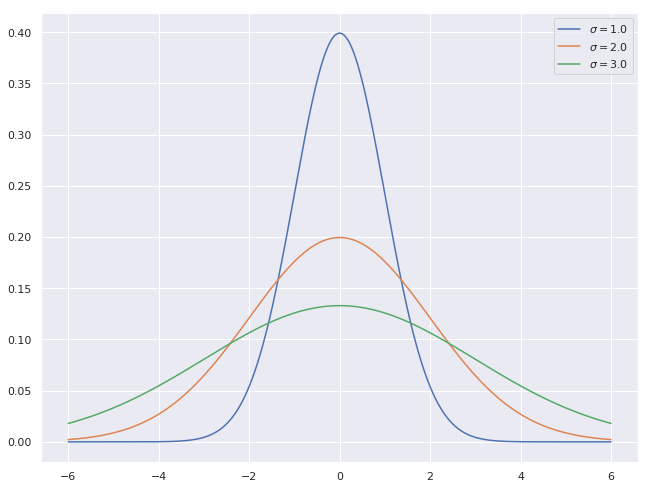

In [44]:
Vs = [1, 4, 9]
Xp = np.linspace(-6, 6, 1000)
for v in Vs:
    stdev = np.sqrt(v)
    sns.lineplot(Xp, sps.norm(0, stdev).pdf(Xp), label='$\sigma = {}$'.format(stdev));

Both $\sigma^2$ and $\sigma$ are properties of the ***population*** - that is, they are independent of the sample data. In contrast to that, we have *sample variance* and *sample standard deviation*, which are properties of the *sample space*.

# $\overline{X}$ - Sample mean

The sample mean is an estimate of the population mean of a distribution. It is defined as:
$$
\overline{X} = \frac{1}{n}\sum^n_i{X_i}
$$

# $s^2$ - Sample variance

The sample variance is, similarly, an estimate of the population variance. It is defined to be:
$$ s^2 = \frac{1}{n-1} \sum_{i}^n{(x_i - \overline{x})^2} $$

More specifically, this is called the ***unbiased sample variance***. It is unbiased because the denominator is $\frac{1}{n-1}$ instead of $\frac{1}{n}$, in which case it would be the ***biased sample variance***.

The sample variance serves as an estimate to the population variance.

# $s$ - Sample standard deviation
Estimating sample standard deviation is a more difficult problem, however for now, we can define it as:

$$ s = \sqrt{s^2} $$

# Standard error

The sample mean is, unsurprisingly, a random variable. It is defined on all the samples $X_{1...n}$, where each $X_i$ is an independent (and thus ***uncorrelated***) random variable as well.

Using this, we can define the population variance of the sample mean as:

$$
\sigma^2_{\overline{X}} = Var(\frac{\sum^n_i{X_i}}{n}) = \frac{1}{n^2}\,Var(\sum^n_i{X_i})
$$

Since each $X_i$ has the same variance (and thus distribution), as the population - $\sigma^2$ - and is uncorrelated to the rest, we get:

$$
\sigma^2_{\overline{X}} = \frac{1}{n^2}\sum^n_i{Var(X_i)} = \frac{n\sigma^2_X}{n^2} = \frac{\sigma^2_X}{n}
$$

Taking the square root of $\sigma^2_{\overline{X}}$ gives us $\frac{\sigma_{\overline{X}}}{\sqrt{n}}$ - this is called the ***standard error of the mean*** and is denoted by $S_E$

However, we know that $\sigma^2$ is estimated by $s^2$. Logically, substituing $\sigma^2_X$ with $s^2_X$, we get:

$$
S_E = \frac{\sigma_X}{\sqrt{n}} \approx \frac{s}{\sqrt{n}}
$$

Let us illustrate this with an example:

## Example

Let $X$ be a random variable with a normal distribution with mean 3 and $\sigma$ 2. We will take 10 samples of $X$ and calculate their sample mean. We will do this 1000 times, estimate the standard error using the above formula and then compare it to the actual value - $S_E$.

In [126]:
nSim = 1000
nSample = 10
stdev = 1
mean = 3
npr.seed(2)
X_bar = np.mean(np.array([npr.normal(mean, stdev, nSample) for _ in range(nSim)]), axis=1)

Plotting the distribution of $\overline{X}$ gives us:

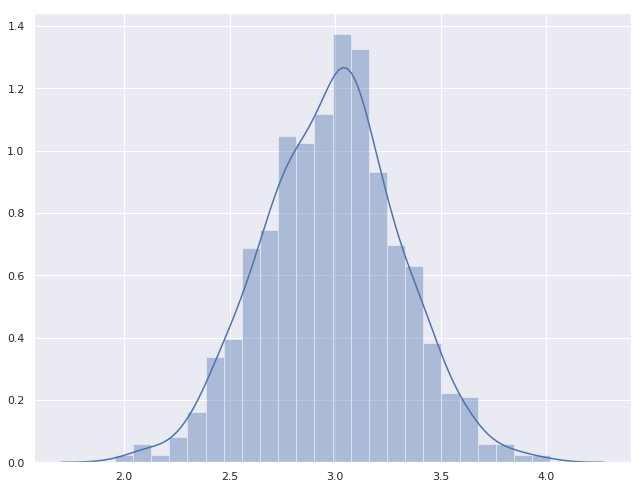

In [127]:
sns.distplot(X_bar, kde=True);

This looks pretty close to the actual mean - 3!

Now we compare the sample and population standard errors:

In [128]:
pSEM = stdev / np.sqrt(nSample) # population Standard Error of the Mean
sSEM = np.std(X_bar)            # sample Standard Error of the Mean

print("Population: {:.4f}\nSample:     {:.4f}".format(pSEM, sSEM))

Population: 0.3162
Sample:     0.3213


Pretty close, eh!